In [45]:
import Preprocessing as pp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [2]:
temp_data_folder = "../Data/Temp_Data/"
image_path = "../Images/"
image_subfolder = "Proposal/"
image_folder = image_path + image_subfolder

pp.checkFolder(temp_data_folder)
pp.checkFolder(image_path)
pp.checkFolder(image_folder)

Folder already exists.
Folder already exists.
Folder already exists.


In [3]:
df_1 = pp.openCSVFile('experiment_1_short.csv', temp_data_folder)
df_4b = pp.openCSVFile('experiment_4b_short.csv', temp_data_folder)
df_9 = pp.openCSVFile('experiment_9_short.csv', temp_data_folder)

In [50]:
approaches = ['LinReg']

In [5]:
#colors
kit_green = '#009682'
kit_blue = '#4664AA'
kit_orange = '#DF9B1B'

In [6]:
from sklearn import linear_model, gaussian_process, neural_network

In [51]:
def mlswitch(argument, j):
    rs = np.random.RandomState(j)
    switcher = {
        'LinReg' : linear_model.LinearRegression(),
        'Ridge' : linear_model.Ridge(random_state=rs),
        'SGD' : linear_model.SGDRegressor(random_state=rs),
        'GPR' : gaussian_process.GaussianProcessRegressor(random_state=rs),
        'NNs' : neural_network.MLPRegressor(hidden_layer_sizes= (100,100,50,50,30,30,), max_iter = 500, random_state=rs)
    }
    return switcher.get(argument, 'Invalid')

In [8]:
from statistics import mean
import timeit

def compareMLApproaches(approaches, inputs):
    df_compared = pd.DataFrame()
    df_compared['approach'] = approaches
    df_validation_data = pd.DataFrame()
    for a in inputs:
        name, x_train, y_train, x_test, y_test = a
        df_compared[name + '_rms'] = 0
        df_compared[name + '_r2'] = 0
        df_compared[name + '_time'] = 0
        time_all_ap, rms_all_ap, r2_all_ap = [],[], []
#         fig, axs = plt.subplots(2,2, figsize=(20,20))
#         axs = axs.ravel()
        for i in range(len(approaches)):
            all_rms, all_r2, all_times, predictions = [], [], [], []
            for j in range(5):
                start = timeit.default_timer()
                model = mlswitch(approaches[i], j)
                model.fit(x_train, y_train)
                stop= timeit.default_timer()
                time = stop - start
                pred = model.predict(x_test)
                predictions.append(pred)
                rms = metrics.mean_squared_error(y_test, pred, squared=False)
                r2 = metrics.r2_score(y_test, pred)
                all_times.append(time)
                all_rms.append(rms)
                all_r2.append(r2)
            rms_all_ap.append(all_rms)
            r2_all_ap.append(all_r2)
            time_all_ap.append(all_times)
            df_compared.loc[i, name + '_rms'] = mean(all_rms)
            df_compared.loc[i, name + '_r2'] = mean(all_r2)
            df_compared.loc[i, name + '_time'] = mean(all_times)
            df_validation_data['predictions_' + name + "_" + approaches[i]] = np.mean(predictions, axis = 0)
#         axs[0].boxplot(rms_all_ap)
#         axs[0].set_title('Comparison RMS between approaches (50 runs)')
#         axs[0].set_xlabel(approaches)
#         axs[0].set_ylabel('RMS')
#         axs[1].boxplot(r2_all_ap)
#         axs[1].set_title('Comparison R^2 between approaches (50 runs)')
#         axs[1].set_xlabel(approaches)
#         axs[1].set_ylabel('R^2')
#         axs[2].boxplot(time_all_ap)
#         axs[2].set_title('Comparison time between approaches (50 runs)')
#         axs[2].set_xlabel(approaches)
#         axs[2].set_ylabel('Time')
    return df_compared, df_validation_data

## Experiment 9 (Haushalt) 

### electrical output 

In [23]:
comparison_el_9, data_el_9 = compareMLApproaches(approaches, [['el_power', df_4b[['input_voltage']], df_4b['el_power'], df_9[['input_voltage']], df_9['el_power']]])

In [24]:
comparison_el_9

,approach,el_power_rms,el_power_r2,el_power_time
0,LinReg,168.249816,0.826690,0.002112
1,NNs,140.609491,0.877262,9.975206


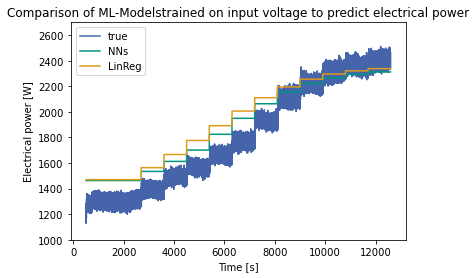

In [25]:
plt.plot(df_9['time'], df_9['el_power'], color = kit_blue, label = 'true')
plt.plot(df_9['time'], data_el_9['predictions_el_power_NNs'], color = kit_green, label = 'NNs')
plt.plot(df_9['time'], data_el_9['predictions_el_power_LinReg'], color = kit_orange, label = 'LinReg')
plt.legend()
plt.ylabel('Electrical power [W]')
plt.ylim([1000, 2700])
plt.xlabel('Time [s]')
plt.title('Comparison of ML-Modelstrained on input voltage to predict electrical power')

plt.savefig(image_folder + 'ex9_ML_volt_time_electric.svg')
plt.savefig(image_folder + 'ex9_ML_volt_time_electric.png')
plt.show()

### thermal output 

In [26]:
comparison_th_9, data_th_9 = compareMLApproaches(approaches, [['th_power', df_4b[['input_voltage']], df_4b['th_power'], df_9[['input_voltage']], df_9['th_power']]])

In [27]:
comparison_th_9

,approach,th_power_rms,th_power_r2,th_power_time
0,LinReg,1076.335975,0.595224,0.003783
1,NNs,1079.232181,0.592937,11.381802


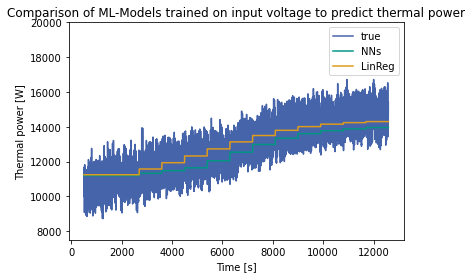

In [28]:
plt.plot(df_9['time'], df_9['th_power'], color = kit_blue, label = 'true')
plt.plot(df_9['time'], data_th_9['predictions_th_power_NNs'], color = kit_green, label = 'NNs')
plt.plot(df_9['time'], data_th_9['predictions_th_power_LinReg'], color = kit_orange, label = 'LinReg')
plt.legend()
plt.ylabel('Thermal power [W]')
plt.ylim([7500, 20000])
plt.xlabel('Time [s]')
plt.title('Comparison of ML-Models trained on input voltage to predict thermal power')

plt.savefig(image_folder + 'ex9_ML_volt_time_thermal.svg')
plt.savefig(image_folder + 'ex9_ML_volt_time_thermal.png')
plt.show()

## Experiment 1 (100-30-100-30) 

### thermal output 

In [29]:
comparison_th_1, data_th_1 = compareMLApproaches(approaches, [['th_power', df_4b[['input_voltage']], df_4b['th_power'], df_1[['input_voltage']], df_1['th_power']]])

In [30]:
comparison_th_1

,approach,th_power_rms,th_power_r2,th_power_time
0,LinReg,2175.681165,0.652161,0.003575
1,NNs,2188.299980,0.648103,11.001358


In [ ]:
plt.plot(df_1['time'], df_1['th_power'], color = kit_blue, label = 'true')
plt.plot(df_1['time'], data_th_1['predictions_th_power_NNs'], color = kit_green, label = 'NNs')
plt.plot(df_1['time'], data_th_1['predictions_th_power_LinReg'], color = kit_orange, label = 'LinReg')
plt.legend()
plt.ylabel('Thermal power [W]')
plt.ylim([3000, 20000])
plt.xlabel('Time [s]')
plt.title('Comparison of ML-Models on Experiment 1\ntrained on input voltage and time to predict thermal power')

plt.savefig(image_folder + 'ex1_ML_volt_time_thermal.svg')
plt.savefig(image_folder + 'ex1_ML_volt_time_thermal.png')
plt.show()

### electric output 

In [52]:
comparison_el_1, data_el_1 = compareMLApproaches(approaches, [['el_power', df_4b[['input_voltage']], df_4b['el_power'], df_1[['input_voltage']], df_1['el_power']]])

In [53]:
comparison_el_1

,approach,el_power_rms,el_power_r2,el_power_time
0,LinReg,458.69175,0.793628,0.001871


In [ ]:
X_test = []
for i in range(60, df_1.shape[0]):
    X_test.append(df_1[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

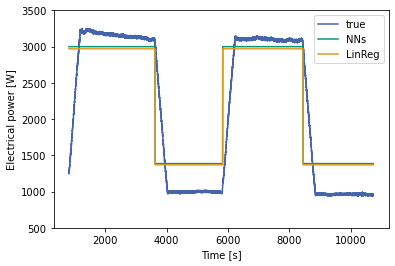

In [41]:
plt.plot(df_1['time'], df_1['el_power'], color = kit_blue, label = 'true')
plt.plot(df_1['time'], data_el_1['predictions_el_power_NNs'], color = kit_green, label = 'NNs')
plt.plot(df_1['time'], data_el_1['predictions_el_power_LinReg'], color = kit_orange, label = 'LinReg')
plt.legend()
plt.ylabel('Electrical power [W]')
plt.ylim([500, 3500])
plt.xlabel('time [s]')

plt.savefig(image_folder + 'ex1_ML_volt_time_electric.svg')
plt.savefig(image_folder + 'ex1_ML_volt_time_electric.png')
plt.show()

In [ ]:
def measureDifference(data, value_header, approx_header):
    R_SQUARED = True
    RSME = True
    
    data = data[data[approx_header].notnull()]
    values = data[value_header]
    approx = data[approx_header]
    
    if RSME:
        rms = metrics.mean_squared_error(values, approx, squared=False)
        print('The RMSE is %5.3f' %rms)
    if R_SQUARED:
        r2 = metrics.r2_score(values, approx)
        print('The R2-score is %5.3f' %r2)

In [ ]:
measureDifference(data_el_1, "el_power", "predictions_el_power_LinReg")